#*-- Soal --*


# **Data Cleansing**
Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti: <br/>
A.Handle missing values <br/>
B.Handle duplicated data <br/>
C.Handle outliers <br/>
D.Feature transformation<br/>
E.Feature encoding<br/>
F.Handle class imbalance<br/>
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.
* Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier”).

# **Feature Engineering**
Cek feature yang ada sekarang, lalu lakukan: <br/>
A. Feature selection (membuang feature yang kurang relevan atau redundan) <br/>
B. Feature extraction (membuat feature baru dari feature yang sudah ada) <br/>
C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)

# **Git**
Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada perubahan version dari waktu ke waktu. <br/>
A.Buat Repository Git <br/>
B.Upload file notebook atau file pengerjaan lainnya pada repository tersebut<br/>
Untuk file README, dapat merupakan summary dari proses data preproses yang telah dilakukan. Boleh menggunakan repositori yang sama atau membuat baru. 


________________________________

# *-- Jawaban --*

# **Data Cleansing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/she1031/tutorial_repo/main/aug_train%20(1).csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df['target'] = df['target'].astype(int)
df['enrollee_id'] = df['enrollee_id'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  object 
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(11)
me

## A. Handling Missing Value

In [ ]:
def find_columns_with_missing_values_and_count(df):
    columns_with_missing_values = df.columns[df.isna().any()].tolist()
    missing_values_count = df[columns_with_missing_values].isna().sum().to_dict()
    return columns_with_missing_values, missing_values_count

columns_with_missing_values, missing_values_count = find_columns_with_missing_values_and_count(df)

missing_values_df = pd.DataFrame({'Column Name': columns_with_missing_values, 
                                  'Missing Values Count': list(missing_values_count.values())})
missing_values_df

,Column Name,Missing Values Count
0,gender,4508
1,enrolled_university,386
2,education_level,460
3,major_discipline,2813
4,experience,65
5,company_size,5938
6,company_type,6140
7,last_new_job,423


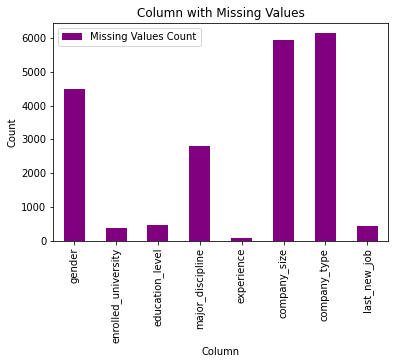

In [ ]:
missing_values_df.plot(kind='bar', x='Column Name', y='Missing Values Count', color='purple')
plt.xlabel("Column")
plt.ylabel("Count")
plt.title("Column with Missing Values")
plt.show()

In [ ]:
print(df['company_size'].value_counts())

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64


In [ ]:
df['company_size'] = df['company_size'].replace('10/49', '10-49')

In [ ]:
df['gender'] = df['gender'].fillna('Other')
df['enrolled_university'].fillna(df['enrolled_university'].mode()[0], inplace=True)
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)
df['major_discipline'] = df['major_discipline'].fillna('Other')
df['experience'].fillna(df['experience'].mode()[0], inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0], inplace=True)
df['company_type'] = df['company_type'].fillna('Other')
df['last_new_job'].fillna(df['last_new_job'].mode()[0], inplace=True)

In [ ]:
#df.dropna(subset=['company_size'],inplace=True)

In [ ]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  object 
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(11)
me

**Note:**<br/>
Handling missing value masih bersifat temporary. Apabila setelah dicek performa model dengan handling seperti ini kurang memuaskan, maka akan dilakukan percobaan ulang pada tahap ini dan akan dicari cara penanganan yang lebih tepat agar dapat meningkatkan performa model.

## B. Handling Duplicated Data

In [ ]:
def find_duplicate_rows(df):
    duplicate_rows = df[df.duplicated()]
    return duplicate_rows

duplicate_rows = find_duplicate_rows(df)

print("Duplicate rows in the DataFrame:")
print(duplicate_rows)


Duplicate rows in the DataFrame:
Empty DataFrame
Columns: [enrollee_id, city, city_development_index, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job, training_hours, target]
Index: []


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset=['enrollee_id']).sum()

0

## C. Handling Invalid Values

In [ ]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  object 
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(11)
me

In [ ]:
df.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


-

# **Feature Engineering**

## D. Feature Extraction

#### ***Membuat kolom* `experience_level`**

Untuk mengetahui kualifikasi dari tiap kandidat berdasarkan berapa tahun pengalaman di dunia kerja. Dapat dikategorikan menjadi beberapa level dan dibuat kolom baru `experience_level` untuk mempermudah analisis.
- `0` = novice 
- `1-5` = Advanced beginner
- `6-15` = Competent
- `16-20` = Proficient
- `21` = Expert (diubah menjadi int8 sehingga valuenya menjadi 21)

Note:
- Range dari setiap level dapat di-*customize* berdasarkan kebutuhan.
- 0 = experience <1 dan 21 = experience >20 (karena kolom `experience` diubah dari tipe data object menjadi int8)

In [ ]:
print(df['experience'].value_counts())

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64


In [ ]:
novice = '<1'
advanced_beginner = ['1', '2', '3', '4', '5']
competent = ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
proficient = ['16', '17', '18', '19', '20']
expert = '>20'

def get_experience_level(x):
    if x == novice:
        return 'novice'
    elif x in advanced_beginner:
        return 'advanced beginner'
    elif x in competent:
        return 'competent'
    elif x in proficient:
        return 'proficient'
    elif x == expert:
        return 'expert'
    else:
        return None

df['experience_level'] = df['experience'].apply(get_experience_level)

print(df['experience_level'].value_counts())

competent            7840
advanced beginner    5863
expert               3351
proficient           1582
novice                522
Name: experience_level, dtype: int64


In [ ]:
df['experience_level'].value_counts()

competent            7840
advanced beginner    5863
expert               3351
proficient           1582
novice                522
Name: experience_level, dtype: int64

#### ***Membuat kolom* `Graduate` *(unique value 'yes' dan 'no')***
Membedakan antara kandidat yang sudah lulus kuliah (graduate) atau yang tidak/belum kuliah (non-graduate). Berikut adalah beberapa alasan kenapa kita memerlukan feature ini dalam memilih kandidat job hiring:
- Menyelesaikan gelar universitas dapat menandakan tingkat komitmen dan disiplin tertentu. Pemberi kerja mungkin melihat kandidat lulusan sebagai orang yang telah menunjukkan kemampuan untuk menetapkan dan mencapai tujuan, dan memiliki ketekunan untuk menyelesaikan program yang menantang.
- Pendidikan universitas biasanya mencakup berbagai macam mata pelajaran yang memberikan dasar pengetahuan yang umum, seperti critical thinking, problem soling, communication dan research skill.
- Secara umum, memiliki gelar seringkali menjadi syarat untuk pekerjaan data scientist level entry, meskipun hal ini dapat bervariasi tergantung pada perusahaan dan persyaratan pekerjaan tertentu.

Kolom yang digunakan adalah `education_level` dimana penggunaan unique value-nya pada kolom baru `graduate` adalah sebagai berikut:
- 'Primary School' dan 'High School' = 'no'
- 'Graduate', 'Masters', 'Phd' = 'yes'


In [ ]:
print (df['education_level'].value_counts())

Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


In [ ]:
yes = ['Graduate', 'Masters', 'Phd']
no = ['Primary School', 'High School']

def get_graduation_status(x):
    if x in yes:
        return 'yes'
    else:
        return 'no'

df['graduate'] = df['education_level'].apply(get_graduation_status)

print(df['graduate'].value_counts())

yes    16833
no      2325
Name: graduate, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  object 
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
 14  experience_level        19158 non-null

In [ ]:
df['experience_level'].value_counts()

competent            7840
advanced beginner    5863
expert               3351
proficient           1582
novice                522
Name: experience_level, dtype: int64

In [ ]:
df.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_level,graduate
366,604,city_16,0.910,Male,No relevent experience,no_enrollment,Graduate,Other,3,50-99,Other,never,24,0,advanced beginner,yes
11584,21796,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Pvt Ltd,1,70,0,proficient,yes
7047,373,city_10,0.895,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,50-99,Funded Startup,1,24,0,proficient,yes
6648,29133,city_103,0.920,Other,Has relevent experience,no_enrollment,Graduate,STEM,6,500-999,Pvt Ltd,2,55,0,competent,yes
661,22573,city_114,0.926,Other,Has relevent experience,no_enrollment,Graduate,STEM,8,500-999,Pvt Ltd,never,53,0,competent,yes
5190,16615,city_162,0.767,Other,Has relevent experience,no_enrollment,Graduate,Other,16,50-99,Other,1,43,0,proficient,yes
647,4072,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,Humanities,>20,10000+,Public Sector,1,20,0,expert,yes
11292,8422,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Other,1,148,0,competent,yes
16590,16027,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,Other,12,10000+,Pvt Ltd,2,80,0,competent,yes
14928,21341,city_21,0.624,Other,Has relevent experience,no_enrollment,Masters,STEM,2,10-49,Early Stage Startup,1,23,0,advanced beginner,yes


## E. Feature Selection

#### ***Drop Features***

**`enrollee_id`**

In [ ]:
#Drop `enrollee_id`
df.drop('enrollee_id', axis=1, inplace=True)
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_level,graduate
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Other,1,36,1,expert,yes
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,competent,yes
2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,50-99,Other,never,83,0,advanced beginner,yes
3,city_115,0.789,Other,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1,novice,yes
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,expert,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Other,1,42,1,competent,yes
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Other,4,52,1,competent,yes
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0,expert,yes
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Other,<1,500-999,Pvt Ltd,2,97,0,novice,no


**`city`**

In [ ]:
#Drop 'city`
#df['city'].nunique() #123
#df.drop('city', axis=1, inplace=True)

Kolom `city` bisa didrop karena memiliki jumlah unique values yang tinggi. Namun, untuk sekarang `city` akan dimasukkan terlebih dahulu dan akan dinilai performanya. Kita ingin mengetahui perbedaan performa model jika kita include dan tidak include kolom `city`.

**`education_level` dan `experience`**

In [ ]:
#Drop `education_level`
#df.drop('education_level', axis=1, inplace=True)

In [ ]:
#Drop `experience`
#df.drop('education_level', axis=1, inplace=True)

Sedangkan, kolom `education_level` dan `experience`juga memiliki kemungkinan untuk di-drop karena di bagian feature extraction, kita telah membuat kolom baru yang memberikan insight yang kita butuhkan berdasarkan 2 kolom ini. Tapi, sama dengan kolom `city`, kita akan tetap memasukkan kedua kolom ini dan diuji performa modelnya terlebih dahulu.

**Notes:** <br/>
Karena jumlah data dan feature dalam dataset ini termasuk sedikit, semua fitur (kecuali enrollee_id) akan digunakan untuk machine learning.Setelah proses modelling, dapat dilihat mana fitur yang penting dan mana yang tidak, sehingga fitur yang tidak penting dapat di-drop.

#### ***Heatmap Correlation Plot***

In [ ]:
#plt.figure(figsize=(20, 20))
#sns.heatmap(smote_X_train.corr(), cmap='Blues', annot=True, fmt='.2f')

Pada dataset ini, heatmap correlation plot tidak digunakan untuk feature selection. Heatmap corrplot hanya mengecek hubungan linear antara fitur, sehingga bisa saja ada fitur yang penting namun memiliki hubungan non-linear yang tidak terlihat pada heatmap corrplot.

#### ***Additional Features***
#### **`Unemployment Duration`** <br/>
Jika diberikan kesempatan untuk bekerja sebagai data scientist, orang yang telah menganggur dalam waktu yang lama pasti akan tertarik untuk mengambil kesempatan ini dan beralih profesi. <br/>
 <br/>
#### **`Salary`** <br/>
Jika kita menawarkan gaji sebesar xxx, maka kemungkinan orang yang saat ini menerima gaji di bawah jumlah tersebut akan lebih tinggi untuk mempertimbangkan perubahan pekerjaan. <br/>
 <br/>
#### **`Relevance between current job and major discipline`** <br/>
Orang yang memiliki latar belakang pekerjaan di luar disiplin ilmu STEM atau disiplin ilmu yang relevan dengan bidang data science berkemungkinan tinggi untuk mempertimbangkan beralih profesi ke bidang data science jika diberikan kesempatan dalam program data scientist hiring. <br/>
 <br/>
#### **`Age`** <br/>
Orang yang telah memasuki usia tua cenderung kurang berminat untuk mengganti pekerjaan lagi. Alasannya bisa berupa: <br/>
- Sudah memiliki pengalaman dan keterampilan pada bidang pekerjaannya sekarang yang telah dikembangkan bertahun-tahun. <br/>
- Sudah nyaman dengan perusahaan yang sekarang dan cenderung merasa sulit untuk beradaptasi dengan work culture yang baru.




## F. Handling Outliers

Ada dua cara untuk meng-handle outliers, antara lain:
- z-score
- IQR

Berikut adalah perbedaan, kekurangan, dan kelebihan dari metode z-score dan IQR dalam menghandle outliers (ChatGPT, 2023):

Perbedaan: <br/>
- Z-score mengukur seberapa jauh nilai dari rata-rata dalam satuan standar deviasi, sedangkan IQR menghitung jarak antara kuartil atas dan kuartil bawah dalam distribusi data.
- Z-score bergantung pada rata-rata dan standar deviasi dari seluruh data, sedangkan IQR hanya bergantung pada kuartil atas dan kuartil bawah yang dihitung dari setengah data tengah.
- Z-score cocok digunakan pada data dengan distribusi normal, sedangkan IQR lebih tahan terhadap pencilan (outliers) dan dapat digunakan pada data dengan distribusi yang tidak normal.

Kekurangan:
- Z-score rentan terhadap outliers yang sangat ekstrem, karena standar deviasi dipengaruhi oleh outliers. Jika ada beberapa outlier yang sangat ekstrem, mereka dapat memberi dampak yang signifikan pada standar deviasi, sehingga menimbulkan kesalahan dalam pengukuran jarak data dari rata-rata.
- IQR dapat menghasilkan batas atas dan bawah yang terlalu longgar atau terlalu ketat jika data memiliki banyak atau sedikit outliers.
Kelebihan:
- Z-score dapat digunakan untuk menentukan nilai-nilai yang jauh dari norma, yaitu data yang terlalu besar atau terlalu kecil.
IQR dapat memfilter outlier dengan lebih baik daripada Z-score, terutama pada data yang tidak terdistribusi secara normal.
Dalam memilih metode untuk menghandle outliers, penting untuk mempertimbangkan sifat dataset yang digunakan serta karakteristik dari masing-masing metode.

*(only for reference)*

Coba keduanya dan dibandingkan hasilnya.

### ***z-score***

In [ ]:
#from scipy import stats
#print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

#filtered_entries = np.array([True] * len(df))

#for col in ['city_development_index',	'training_hours','target']:
    #zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    #filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
#df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

#print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

In [ ]:
#num = ['city_development_index', 'training_hours']
#obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       #'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       #'last_new_job', 'experience_level', 'graduate']

In [ ]:
#df.info()

In [ ]:
#for i in range(0, len(num)):
    #plt.subplot(2,1, i+1)
    #sns.kdeplot(x = df[num[i]], color='blue')
    #plt.xlabel(num[i])

#plt.tight_layout()

### ***IQR***

#### `city_development_index`

In [ ]:
import numpy as np

Q1 = np.percentile(df['city_development_index'], 25)
Q3 = np.percentile(df['city_development_index'], 75)
IQR = Q3 - Q1
IQR

0.18000000000000005

In [ ]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [ ]:
outliers = df.loc[(df['city_development_index'] < lower_bound) | (df['city_development_index'] > upper_bound)]

In [ ]:
df.loc[(df['city_development_index'] < lower_bound) | (df['city_development_index'] > upper_bound), 'city_development_index'] = np.nan

In [ ]:
outliers

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_level,graduate
1523,city_33,0.448,Other,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1,competent,yes
4744,city_33,0.448,Other,No relevent experience,Full time course,Graduate,STEM,2,50-99,Other,never,43,1,advanced beginner,yes
5010,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,50-99,Other,never,73,1,advanced beginner,yes
5265,city_33,0.448,Other,No relevent experience,no_enrollment,High School,Other,5,50-99,Pvt Ltd,never,86,1,advanced beginner,no
5567,city_33,0.448,Other,Has relevent experience,Part time course,Masters,STEM,6,50-99,Other,1,18,1,competent,yes
6127,city_33,0.448,Other,No relevent experience,Full time course,Graduate,STEM,4,50-99,Public Sector,4,32,1,advanced beginner,yes
7724,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0,competent,yes
7864,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Other,>4,74,0,competent,yes
9134,city_33,0.448,Other,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1,advanced beginner,yes
10401,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0,advanced beginner,yes


In [ ]:
df.isna().sum()

city                       0
city_development_index    17
gender                     0
relevent_experience        0
enrolled_university        0
education_level            0
major_discipline           0
experience                 0
company_size               0
company_type               0
last_new_job               0
training_hours             0
target                     0
experience_level           0
graduate                   0
dtype: int64

In [ ]:
df = df.dropna(subset=['city_development_index'])
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_level,graduate
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Other,1,36,1,expert,yes
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,competent,yes
2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,50-99,Other,never,83,0,advanced beginner,yes
3,city_115,0.789,Other,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1,novice,yes
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,expert,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Other,1,42,1,competent,yes
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Other,4,52,1,competent,yes
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0,expert,yes
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Other,<1,500-999,Pvt Ltd,2,97,0,novice,no


#### `training_hours`

In [ ]:
Q1 = np.percentile(df['training_hours'], 25)
Q3 = np.percentile(df['training_hours'], 75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers_1 = df.loc[(df['training_hours'] < lower_bound) | (df['training_hours'] > upper_bound)]

df.loc[(df['training_hours'] < lower_bound) | (df['training_hours'] > upper_bound), 'training_hours'] = np.nan

outliers_1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_level,graduate
35,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,10-49,Early Stage Startup,2,206,0,competent,yes
69,city_90,0.698,Other,No relevent experience,no_enrollment,Graduate,Other,2,50-99,Pvt Ltd,never,228,1,advanced beginner,yes
89,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Other,1,332,0,competent,yes
110,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd,1,210,0,competent,yes
119,city_160,0.920,Male,Has relevent experience,Part time course,Graduate,Business Degree,10,50-99,Funded Startup,1,260,0,competent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,city_65,0.802,Other,No relevent experience,no_enrollment,Graduate,Other,4,50-99,Other,2,304,0,advanced beginner,yes
19107,city_160,0.920,Male,No relevent experience,Part time course,Graduate,STEM,3,50-99,Other,1,322,1,advanced beginner,yes
19117,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Other,>4,214,0,expert,yes
19118,city_126,0.479,Other,No relevent experience,no_enrollment,Graduate,Other,1,50-99,Other,never,316,1,advanced beginner,yes


In [ ]:
df.isna().sum()

city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
company_size                0
company_type                0
last_new_job                0
training_hours            984
target                      0
experience_level            0
graduate                    0
dtype: int64

In [ ]:
df = df.dropna(subset=['training_hours'])
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,experience_level,graduate
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Other,1,36.0,1,expert,yes
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0,competent,yes
2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,50-99,Other,never,83.0,0,advanced beginner,yes
3,city_115,0.789,Other,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52.0,1,novice,yes
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0,expert,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Other,1,42.0,1,competent,yes
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Other,4,52.0,1,competent,yes
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44.0,0,expert,yes
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Other,<1,500-999,Pvt Ltd,2,97.0,0,novice,no


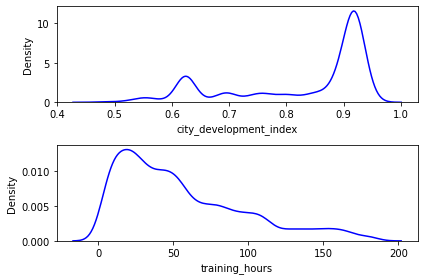

In [ ]:
num = ['city_development_index', 'training_hours']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(2,1, i+1)
    sns.kdeplot(x = df[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

In [ ]:
df.describe()

,city_development_index,training_hours,target
count,18157.000000,18157.000000,18157.000000
mean,0.829318,55.507518,0.250923
std,0.122815,42.311416,0.433556
min,0.479000,1.000000,0.000000
25%,0.740000,22.000000,0.000000
50%,0.903000,45.000000,0.000000
75%,0.920000,80.000000,1.000000
max,0.949000,184.000000,1.000000


In [ ]:
df[['city_development_index',	'training_hours','target']].describe()

,city_development_index,training_hours,target
count,18157.000000,18157.000000,18157.000000
mean,0.829318,55.507518,0.250923
std,0.122815,42.311416,0.433556
min,0.479000,1.000000,0.000000
25%,0.740000,22.000000,0.000000
50%,0.903000,45.000000,0.000000
75%,0.920000,80.000000,1.000000
max,0.949000,184.000000,1.000000


In [ ]:
df.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
experience_level          0
graduate                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18157 non-null  object 
 1   city_development_index  18157 non-null  float64
 2   gender                  18157 non-null  object 
 3   relevent_experience     18157 non-null  object 
 4   enrolled_university     18157 non-null  object 
 5   education_level         18157 non-null  object 
 6   major_discipline        18157 non-null  object 
 7   experience              18157 non-null  object 
 8   company_size            18157 non-null  object 
 9   company_type            18157 non-null  object 
 10  last_new_job            18157 non-null  object 
 11  training_hours          18157 non-null  float64
 12  target                  18157 non-null  int64  
 13  experience_level        18157 non-null  object 
 14  graduate                18157 non-null

## G. Feature Transformation (Numeric)

Skewed distribution =  MinMaxScaler <br/>
Normal distribution = StandardScaler <br/>
 <br/>
**Note:** <br/>
Tidak boleh menggunakan keduanya secara bersamaan.
<br/>


Karena data berdistribusi skewed, maka sebaiknya menggunakan normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df['city_development_index_norm'] = MinMaxScaler().fit_transform(df['city_development_index'].values.reshape(len(df), 1))
#df['city_development_index_std'] = StandardScaler().fit_transform(df['city_development_index'].values.reshape(len(df), 1))

df['training_hours_norm'] = MinMaxScaler().fit_transform(df['training_hours'].values.reshape(len(df), 1))
#df['training_hours_std'] = StandardScaler().fit_transform(df['training_hours'].values.reshape(len(df), 1))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df[['city_development_index','city_development_index_norm','training_hours','training_hours_norm']].describe()

,city_development_index,city_development_index_norm,training_hours,training_hours_norm
count,18157.000000,18157.000000,18157.000000,18157.000000
mean,0.829318,0.745357,55.507518,0.297855
std,0.122815,0.261309,42.311416,0.231210
min,0.479000,0.000000,1.000000,0.000000
25%,0.740000,0.555319,22.000000,0.114754
50%,0.903000,0.902128,45.000000,0.240437
75%,0.920000,0.938298,80.000000,0.431694
max,0.949000,1.000000,184.000000,1.000000


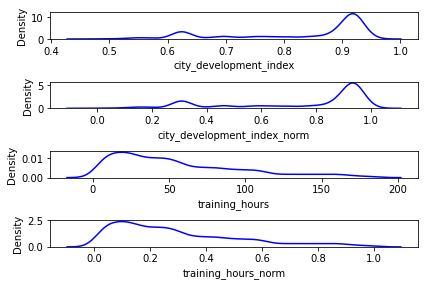

In [ ]:
num = ['city_development_index', 'city_development_index_norm', 'training_hours','training_hours_norm']
obj = ['city','gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'experience_level', 'graduate']

for i in range(0, len(num)):
    plt.subplot(4,1, i+1)
    sns.kdeplot(x = df[num[i]], color='blue')
    plt.xlabel(num[i])

plt.tight_layout()

## H. Feature Encoding (Categorical)

In [ ]:
for col in obj:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom city:
city_103    4137
city_21     2562
city_16     1457
city_114    1282
city_160     795
            ... 
city_25        3
city_166       3
city_121       3
city_129       2
city_140       1
Name: city, Length: 121, dtype: int64

Value count kolom gender:
Male      12539
Other      4442
Female     1176
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13083
No relevent experience      5074
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13482
Full time course     3559
Part time course     1116
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11405
Masters            4168
High School        1913
Phd                 383
Primary School      288
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               13734
Other               3019
Humanities           635
Business Degree      308
Arts            

In [ ]:
df['city'] = df['city'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['relevent_experience'] = df['relevent_experience'].astype('category').cat.codes
df['enrolled_university'] = df['enrolled_university'].astype('category').cat.codes
df['education_level'] = df['education_level'].astype('category').cat.codes
df['experience'] = df['experience'].astype('category').cat.codes
df['last_new_job'] = df['last_new_job'].astype('category').cat.codes
df['experience_level'] = df['experience_level'].astype('category').cat.codes


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
df.isna().sum()

city                           0
city_development_index         0
gender                         0
relevent_experience            0
enrolled_university            0
education_level                0
major_discipline               0
experience                     0
company_size                   0
company_type                   0
last_new_job                   0
training_hours                 0
target                         0
experience_level               0
graduate                       0
city_development_index_norm    0
training_hours_norm            0
dtype: int64

In [ ]:
df.describe()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,experience_level,city_development_index_norm,training_hours_norm
count,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000
mean,43.469351,0.829318,1.179876,0.279451,1.546511,0.691193,12.955059,1.747976,55.507518,0.250923,1.173211,0.745357,0.297855
std,34.682394,0.122815,0.526377,0.448742,0.799936,0.994741,6.607373,1.935122,42.311416,0.433556,1.142768,0.261309,0.231210
min,0.000000,0.479000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.740000,1.000000,0.000000,1.000000,0.000000,7.000000,0.000000,22.000000,0.000000,0.000000,0.555319,0.114754
50%,48.000000,0.903000,1.000000,0.000000,2.000000,0.000000,14.000000,1.000000,45.000000,0.000000,1.000000,0.902128,0.240437
75%,63.000000,0.920000,1.000000,1.000000,2.000000,2.000000,19.000000,4.000000,80.000000,1.000000,2.000000,0.938298,0.431694
max,120.000000,0.949000,2.000000,1.000000,2.000000,4.000000,21.000000,5.000000,184.000000,1.000000,4.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         18157 non-null  int8   
 1   city_development_index       18157 non-null  float64
 2   gender                       18157 non-null  int8   
 3   relevent_experience          18157 non-null  int8   
 4   enrolled_university          18157 non-null  int8   
 5   education_level              18157 non-null  int8   
 6   major_discipline             18157 non-null  object 
 7   experience                   18157 non-null  int8   
 8   company_size                 18157 non-null  object 
 9   company_type                 18157 non-null  object 
 10  last_new_job                 18157 non-null  int8   
 11  training_hours               18157 non-null  float64
 12  target                       18157 non-null  int64  
 13  experience_level

In [ ]:
for cat in ['major_discipline','company_size','company_type','graduate']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [ ]:
df1 = df.drop(columns=['major_discipline','company_size','company_type','graduate', 'experience', 'training_hours',
                       'city_development_index']).copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              18157 non-null  int8   
 1   gender                            18157 non-null  int8   
 2   relevent_experience               18157 non-null  int8   
 3   enrolled_university               18157 non-null  int8   
 4   education_level                   18157 non-null  int8   
 5   last_new_job                      18157 non-null  int8   
 6   target                            18157 non-null  int64  
 7   experience_level                  18157 non-null  int8   
 8   city_development_index_norm       18157 non-null  float64
 9   training_hours_norm               18157 non-null  float64
 10  major_discipline_Arts             18157 non-null  uint8  
 11  major_discipline_Business Degree  18157 non-null  uint8  
 12  majo

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## I. Handling Class Imbalance

Ada 2 cara yang dapat digunakan untuk mengatasi class imbalance, yaitu:
- Oversampling
- Undersampling

Coba keduanya dan dibandingkan.


Note: <br/>
- [ ] ada mild (20-40%), moderate (1-20%), extreme (<1%)
- [ ] harus dijadikan presentase
- [ ] ini 33% jadi masuk ke mild jadi harus dilakukan handling, kecuali dia diatas mild.
- [ ] pas kerja kalo bisa harus menghindari smote ini.

In [ ]:
df_new = df1

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18157 entries, 0 to 19157
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              18157 non-null  int8   
 1   gender                            18157 non-null  int8   
 2   relevent_experience               18157 non-null  int8   
 3   enrolled_university               18157 non-null  int8   
 4   education_level                   18157 non-null  int8   
 5   last_new_job                      18157 non-null  int8   
 6   target                            18157 non-null  int64  
 7   experience_level                  18157 non-null  int8   
 8   city_development_index_norm       18157 non-null  float64
 9   training_hours_norm               18157 non-null  float64
 10  major_discipline_Arts             18157 non-null  uint8  
 11  major_discipline_Business Degree  18157 non-null  uint8  
 12  majo

In [ ]:
df_new['target'].value_counts()

0    13601
1     4556
Name: target, dtype: int64

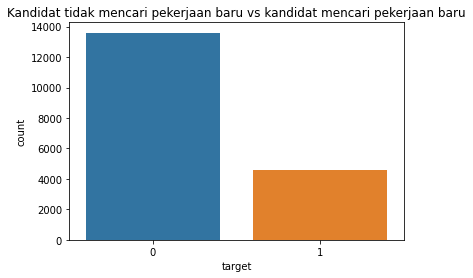

In [ ]:
sns.countplot(x=df_new['target'], data=df_new)
plt.title('Kandidat tidak mencari pekerjaan baru vs kandidat mencari pekerjaan baru')
plt.show()

In [ ]:
class_distribution = df_new['target'].value_counts(normalize=True)

imbalance_ratio = class_distribution.min() / class_distribution.max()

# print the results
print("Class distribution:\n", class_distribution)
print("Imbalance ratio: {:.2f}".format(imbalance_ratio))

Class distribution:
 0    0.749077
1    0.250923
Name: target, dtype: float64
Imbalance ratio: 0.33


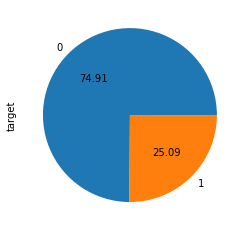

In [ ]:
df_new['target'].value_counts().plot.pie(autopct='%.2f')

### Smote

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
y_train=df_new['target']
X_train=df_new

In [ ]:
smote = SMOTE(random_state=42)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)
smote_X_train.shape, smote_y_train.shape

((27202, 32), (27202,))

In [ ]:
print('Before sampling class distribution:-',Counter(y_train))
print('After sampling class distribution:-',Counter(smote_y_train))

Before sampling class distribution:- Counter({0: 13601, 1: 4556})
After sampling class distribution:- Counter({1: 13601, 0: 13601})


In [ ]:
smote_y_train.value_counts()

1    13601
0    13601
Name: target, dtype: int64

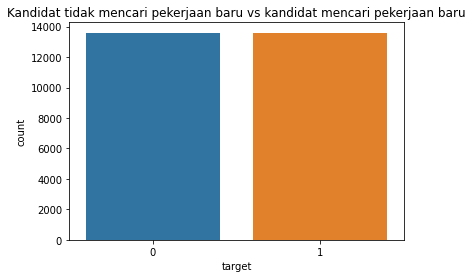

In [ ]:
sns.countplot(x=smote_y_train, data=smote_X_train)
plt.title('Kandidat tidak mencari pekerjaan baru vs kandidat mencari pekerjaan baru')
plt.show()

In [ ]:
smote_X_train.tail()

,city,gender,relevent_experience,enrolled_university,education_level,last_new_job,target,experience_level,city_development_index_norm,training_hours_norm,...,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,graduate_no,graduate_yes
27197,119,1,0,2,2,3,1,3,0.973135,0.256182,...,0,0,0,0,0,0,0,0,0,1
27198,6,1,0,2,0,4,1,1,0.946809,0.168788,...,0,0,0,0,0,0,0,1,0,1
27199,9,1,0,0,0,0,1,0,0.357653,0.090015,...,0,0,0,0,0,1,0,0,0,1
27200,63,2,0,2,0,0,1,2,0.308511,0.156335,...,0,0,0,0,0,0,0,1,0,1
27201,5,1,0,2,0,4,1,1,0.938298,0.619474,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
smote_X_train.describe()

,city,gender,relevent_experience,enrolled_university,education_level,last_new_job,target,experience_level,city_development_index_norm,training_hours_norm,...,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,graduate_no,graduate_yes
count,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,...,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000,27202.000000
mean,44.406882,1.152011,0.284060,1.456988,0.626866,1.679913,0.500000,1.049886,0.696303,0.293647,...,0.022609,0.050290,0.024557,0.039776,0.018822,0.375708,0.037608,0.444159,0.103853,0.887361
std,33.976454,0.522303,0.450974,0.850334,0.950769,1.946379,0.500009,1.113884,0.283377,0.218367,...,0.148655,0.218548,0.154774,0.195437,0.135899,0.484314,0.190249,0.496881,0.305075,0.316157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.308511,0.123827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,48.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.500000,1.000000,0.874468,0.240437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,63.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.938298,0.420765,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,120.000000,2.000000,1.000000,2.000000,4.000000,5.000000,1.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
smote_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27202 entries, 0 to 27201
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              27202 non-null  int8   
 1   gender                            27202 non-null  int8   
 2   relevent_experience               27202 non-null  int8   
 3   enrolled_university               27202 non-null  int8   
 4   education_level                   27202 non-null  int8   
 5   last_new_job                      27202 non-null  int8   
 6   target                            27202 non-null  int64  
 7   experience_level                  27202 non-null  int8   
 8   city_development_index_norm       27202 non-null  float64
 9   training_hours_norm               27202 non-null  float64
 10  major_discipline_Arts             27202 non-null  uint8  
 11  major_discipline_Business Degree  27202 non-null  uint8  
 12  majo

### UnderSampling

# New Section

In [ ]:
from sklearn.utils import resample

In [ ]:
df_majority = df_new[df_new.target==0]
df_minority = df_new[df_new.target==1]

In [ ]:
df_majority.shape,df_minority.shape

((13601, 32), (4556, 32))

In [ ]:
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample without replacement
                                 n_samples=4556,     # to match minority class, bisa pakai len untuk nyesuaiin berapa jumlah data minor yang diinginkan
                                 random_state=42)

In [ ]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
df_down=df_downsampled.sample(frac=1)

In [ ]:
df_down['target'].value_counts()

0    4556
1    4556
Name: target, dtype: int64

In [ ]:
df_down.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 11842 to 7845
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              9112 non-null   int8   
 1   gender                            9112 non-null   int8   
 2   relevent_experience               9112 non-null   int8   
 3   enrolled_university               9112 non-null   int8   
 4   education_level                   9112 non-null   int8   
 5   last_new_job                      9112 non-null   int8   
 6   target                            9112 non-null   int64  
 7   experience_level                  9112 non-null   int8   
 8   city_development_index_norm       9112 non-null   float64
 9   training_hours_norm               9112 non-null   float64
 10  major_discipline_Arts             9112 non-null   uint8  
 11  major_discipline_Business Degree  9112 non-null   uint8  
 12  ma

Model Test - Oversampling

In [ ]:
from sklearn.model_selection import train_test_split

x1 = smote_X_train.drop(['target'], axis=1)
y1 = smote_X_train['target']

x_t, x_test, y_t, y_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

In [ ]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27202 entries, 0 to 27201
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city                              27202 non-null  int8   
 1   gender                            27202 non-null  int8   
 2   relevent_experience               27202 non-null  int8   
 3   enrolled_university               27202 non-null  int8   
 4   education_level                   27202 non-null  int8   
 5   last_new_job                      27202 non-null  int8   
 6   experience_level                  27202 non-null  int8   
 7   city_development_index_norm       27202 non-null  float64
 8   training_hours_norm               27202 non-null  float64
 9   major_discipline_Arts             27202 non-null  uint8  
 10  major_discipline_Business Degree  27202 non-null  uint8  
 11  major_discipline_Humanities       27202 non-null  uint8  
 12  majo

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.fit(x_t, y_t)

y_pred = model.predict(x_test)

Learning rate set to 0.037338
0:	learn: 0.6814724	total: 67.6ms	remaining: 1m 7s
1:	learn: 0.6699185	total: 86.1ms	remaining: 43s
2:	learn: 0.6594477	total: 94.9ms	remaining: 31.5s
3:	learn: 0.6496006	total: 104ms	remaining: 25.9s
4:	learn: 0.6405736	total: 114ms	remaining: 22.6s
5:	learn: 0.6326942	total: 122ms	remaining: 20.2s
6:	learn: 0.6255254	total: 131ms	remaining: 18.6s
7:	learn: 0.6183624	total: 140ms	remaining: 17.3s
8:	learn: 0.6124670	total: 153ms	remaining: 16.9s
9:	learn: 0.6064624	total: 163ms	remaining: 16.2s
10:	learn: 0.6007287	total: 173ms	remaining: 15.5s
11:	learn: 0.5952499	total: 184ms	remaining: 15.2s
12:	learn: 0.5903158	total: 196ms	remaining: 14.9s
13:	learn: 0.5857804	total: 205ms	remaining: 14.4s
14:	learn: 0.5821140	total: 213ms	remaining: 14s
15:	learn: 0.5782411	total: 220ms	remaining: 13.6s
16:	learn: 0.5748868	total: 229ms	remaining: 13.2s
17:	learn: 0.5711012	total: 237ms	remaining: 13s
18:	learn: 0.5680047	total: 245ms	remaining: 12.7s
19:	learn: 0.5

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
  print("Accuracy (Test Set) : %.2f" % accuracy_score(ytest, pred))
  print("Precision (Test Set) : %.2f" % precision_score(ytest, pred))
  print("Recall (Test Set) : %.2f" % recall_score(ytest, pred))
  print("F1-Score (Test Set) : %.2f" % f1_score(ytest, pred))

  fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
  print("AUC : %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
  feat_importances = pd.Series(model.feature_importances_, index=x1.columns)
  ax=feat_importances.nlargest(25).plot(kind='barh', figsize=(10,8))
  ax.invert_yaxis()

  plt.xlabel('score')
  plt.ylabel('score')
  plt.title('fitur penting')

def show_best_hyperparameter (model, hyperparameteers):
  for key, value in hyperparameters.item():
    print('best' + key + ':', model.get_params()[key])

In [ ]:
y_pred = model.predict(x_t)
eval_classification(model, y_pred, x_t, y_t, x_t, y_t)

Accuracy (Test Set) : 0.87
Precision (Test Set) : 0.86
Recall (Test Set) : 0.88
F1-Score (Test Set) : 0.87
AUC : 0.87


Model Test - Undersampling

In [ ]:
from sklearn.model_selection import train_test_split

x2 = df_down.drop(['target'], axis=1)
y2 = df_down['target']

x_t2, x_test2, y_t2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=42)

In [ ]:
x_t2 = x2
y_t2 = y2

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

def eval_classification1(model, pred, xtrain, ytrain, xtest, ytest):
  print("Accuracy (Test Set) : %.2f" % accuracy_score(ytest, pred))
  print("Precision (Test Set) : %.2f" % precision_score(ytest, pred))
  print("Recall (Test Set) : %.2f" % recall_score(ytest, pred))
  print("F1-Score (Test Set) : %.2f" % f1_score(ytest, pred))

  fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
  print("AUC : %.2f" % auc(fpr, tpr))

def show_feature_importance1(model):
  feat_importances = pd.Series(model.feature_importances_, index=x2.columns)
  ax=feat_importances.nlargest(25).plot(kind='barh', figsize=(10,8))
  ax.invert_yaxis()

  plt.xlabel('score')
  plt.ylabel('score')
  plt.title('fitur penting')

def show_best_hyperparameter1(model, hyperparameteers):
  for key, value in hyperparameters.item():
    print('best' + key + ':', model.get_params()[key])

In [ ]:
y_pred = model.predict(x_t2)
eval_classification1(model, y_pred, x_t2, y_t2, x_t2, y_t2)

Accuracy (Test Set) : 0.78
Precision (Test Set) : 0.82
Recall (Test Set) : 0.72
F1-Score (Test Set) : 0.77
AUC : 0.78
